![title](oscar.jpeg)

# And The Oscar Goes To.....                                                     
As most people know, before the Academy Awards comes the Golden Globes. But there are so many more movie awards given
out leading up to the Oscars. In this project, I will use 24 movie award results in the months leading up to the
Oscars to predict which film will win Best Picture at the Academy Awards.
Here are the 24 award ceremonies I will be looking at:

**1  American Film Institute Top 10**

**2  BAFTA Awards**

**3  Boston Society of Film Critics Awards**

**4  Chicago Film Critics Association Awards**

**5  Critic's Choice Awards**

**6  Dallas–Fort Worth Film Critics Association Awards**

**7  Detroit Film Critics Society Awards**

**8  Florida Film Critics Circle Awards**

**9  Golden Globe Awards**

**10  Houston Film Critics Society Awards**

**11  Indiana Film Journalists Association Awards**

**12  Las Vegas Film Critics Association Awards**

**13  Los Angeles Film Critics Association Awards**

**14  National Board of Review Awards**

**15  National Society of Film Critics Awards**

**16  New York Film Critics Circle Awards**

**17  North Carolina Film Critics Association Awards**

**18  Online Film Critics Society Awards**

**19  Phoenix Film Critics Society Awards**

**20  Producers Guild of America Awards**

**21  SAG Awards**

**22  St. Louis Gateway Film Critics Association Awards**

**23  Toronto Film Critics Association Awards**

**24  Washington D.C. Area Film Critics Association Awards**

## Methodology
If the winner of a certain award went on to win the best picture, that counts as 2 points. If a nominee for a certain award went onto win best picture, that counts as one point. If the award the won Best Picture wasn't even nominated for a certain award, that would be zero points.

# Collecting Data

## Best Picture Winners
The first step in finding how to predict a Best Picture Winner is finding who won the coveted award. To do this I scraped the wikipedia page for best picture winner. This will be a common theme throughout the project.

In [211]:
import re
import requests
import lxml.html
import numpy as np
import pandas as pd
import math
from bs4 import BeautifulSoup
from os import path
import pandas
try:
    import urllib
except ImportError:
    from urlparse import urlparse

r = requests.get('https://en.wikipedia.org/wiki/Academy_Award_for_Best_Picture') #URL Request

root = BeautifulSoup(r.content) 
bp = []
for j in range(2,7):
    table = root.findAll("table")[j].prettify()
    df = pd.read_html(table)[0] 
    winner = False
    i = 0
    year = ""
    for index, row in df.iterrows():   
        if winner:
            bp.append([row['Film']])
            winner = False
        if year != row["Year"] :
            winner = True
            year = df["Year"][index]
            
table = root.findAll("table")[7].prettify()
df = pd.read_html(table)[0] 
winner = False
i = 0
year = ""
for index, row in df.iterrows():   
    if winner:
        bp.append([row['Films']])
        winner = False
    if year != row["Year"] :
        winner = True
        year = df["Year"][index]
for j in range(8,12):
    table = root.findAll("table")[j].prettify()
    df = pd.read_html(table)[0] 
    winner = False
    i = 0
    year = ""
    for index, row in df.iterrows():   
        if winner:
            bp.append([row['Film']])
            winner = False
        if year != row["Year"] :
            winner = True
            year = df["Year"][index]
years = []
for i in range(1928,2019):
    years.append(i)
bestPictures = pd.DataFrame(bp,columns = ["Best Picture"], index = years)
bestPictures = bestPictures.reindex(index=bestPictures.index[::-1])


## Producer's Guild of America :
Manually put in the 20 years of data. As an example, the first number is a 2. This is because the winner of this award last year was "Green Book", which went on to win Best Picture. The third number is a 1, because three years ago, Moonlight was nominated for this award, but La La Land won it. Moonlight went on to win Best Picture.

In [212]:
df = pd.read_html(table)[0] #Read table with pandas

producersGuild = [2,2,1,1,2,2,2,2,2,2,2,2,1,1,1,2,2,1,2,2,1,2,2,0,2,2,1,2,2,2]
for i in range(61):
    producersGuild.append(None)
bestPictures["Producers Guild"] = producersGuild


## New York Film Critics Circle :
Data Scraped from Wikipedia. This award had no nominees, only a winner

In [213]:
r = requests.get('https://en.wikipedia.org/wiki/New_York_Film_Critics_Circle') #URL Request

root = BeautifulSoup(r.content) 
table = root.findAll("table")[1].prettify()
df = pd.read_html(table)[0] 
df = df.drop(columns = ["Ceremony  [5]","Date"]) 
df = df.drop([84])
years = []
for i in range(1935,2019):
    years.append(i)
df.index = years
df = df.reindex(index=df.index[::-1])
won = df.loc[:,"Best Film Winner" ] 
won2 = bestPictures.loc[2018:1935,"Best Picture" ]
Won = (won2 == won)
Won = Won.replace(True, 2)
bestPictures["New York Film Critics Circle"] = Won


## Washington D.C. Area Film Critics Association :

In [214]:
r = requests.get('https://en.wikipedia.org/wiki/Washington_D.C._Area_Film_Critics_Association_Award_for_Best_Film') #URL Request

root = BeautifulSoup(r.content) 
bp = []

table = root.findAll("table")[1].prettify()
df = pd.read_html(table)[0] 
table = root.findAll("table")[2].prettify()
df2 = pd.read_html(table)[0] 
df = df.append(df2)
df = df.drop(columns = ["Director"])
df = df.set_index('Year')
df = df.reindex(index=df.index[::-1])
df = df.drop([2019])
won = df.loc[:,"Film" ] 
won2 = bestPictures.loc[2018:2002,"Best Picture" ]
Won = (won2 == won)
Won = Won.replace(True, 2)
bestPictures["Washington D.C. Area Film Critics Association"] = Won
s = "Washington D.C. Area Film Critics Association"
bestPictures.loc[2018,s] = 1
bestPictures.loc[2016,s] = 1
bestPictures.loc[2014,s] = 1
bestPictures.loc[2012,s] = 1
bestPictures.loc[2009,s] = 1
bestPictures.loc[2005,s] = 1



## American Film Institute Top 10 :
Only lists top ten films of the year, doesn't specify a winner. Because of this I make each time the Best Picture winner was on the list worth 1.5 because I didn't want to penalize AFI for not chosing a winner.

In [215]:
AFI = [1.5,1.5,1.5,1.5,1.5,1.5,1.5,0,0,1.5,0,1.5,0,1.5,1.5,1.5,1.5,1.5,1.5]
for i in range(72):
    AFI.append(None)
bestPictures["AFI Top 10"] = AFI
bestPictures.loc[2011,"AFI Top 10"] = 1.5
bestPictures.loc[2010,"AFI Top 10"] = 1.5


## Phoenix Film Critics Society :

In [216]:
phoenix = [2,2,1,2,2,2,2,2,2,0,2,2,0,0,0,2,1,1,0]
for i in range(72):
    phoenix.append(None)
bestPictures["Phoenix Film Critics Society"] = phoenix


## Golden Globes :
In 1951, The Golden Globes separated into Comedy/Musical and Drama. Because of this I counted a win in either category as the normal 2 points. And a nomination is eather category as the normal 1 point. I combined both categories under the broad term Golden Globes rather than having a column for both Comedy/Musical and Drama.

In [217]:
r = requests.get("https://en.wikipedia.org/wiki/Golden_Globe_Award_for_Best_Motion_Picture_%E2%80%93_Drama") #URL Request

root = BeautifulSoup(r.content) 
table = root.findAll("table")[3].prettify()
df = pd.read_html(table)[0] 
df = df.append(df2)
for j in range(4,9):
    table = root.findAll("table")[j].prettify()
    df2 = pd.read_html(table)[0] 
    df = df.append(df2)
currYear = 1949
winners = []
nominees = []
for index, row in df.iterrows():   
    if row["Year"] != currYear:
        currYear = row["Year"]
        winners.append(row["Film"])
    else:
        nominees.append(row["Film"])
w = pd.DataFrame(winners,columns = ["Golden Globe - Drama Winners"])
w = w.drop([69,0,1,2,10,11,12,13,14,15,16,17,18,19])
w = w.reindex(index=w.index[::-1])
n = pd.DataFrame(nominees,columns = ["Golden Globe - Drama Nominees"])
n["Golden Globe - Drama Nominees"] = n["Golden Globe - Drama Nominees"].str.replace(r'[^\w\s]+', '')
n["Golden Globe - Drama Nominees"] = n["Golden Globe - Drama Nominees"].str.replace(r'[ \t]+$', '')
w["Golden Globe - Drama Winners"] = w["Golden Globe - Drama Winners"].str.replace(r'[^\w\s]+', '')
w["Golden Globe - Drama Winners"] = w["Golden Globe - Drama Winners"].str.replace(r'[ \t]+$', '')
years = []
for i in range(2018,1962,-1):
    years.append(i)
w.index = years
won = w.loc[:,"Golden Globe - Drama Winners" ] 
won2 = bestPictures.loc[2018:1963,"Best Picture" ]
Won = (won2 == won)
Won = Won.replace(True, 2)
bestPictures["Golden Globes"] = Won
for index, row in bestPictures.iterrows(): 
    if row["Best Picture"] in list(n["Golden Globe - Drama Nominees"]):
        bestPictures.loc[index,"Golden Globes"] = 1



In [218]:
r = requests.get("https://en.wikipedia.org/wiki/Golden_Globe_Award_for_Best_Motion_Picture_%E2%80%93_Musical_or_Comedy") #URL Request

root = BeautifulSoup(r.content) 
table = root.findAll("table")[3].prettify()
df = pd.read_html(table)[0] 
df = df.append(df2)
for j in range(4,9):
    table = root.findAll("table")[j].prettify()
    df2 = pd.read_html(table)[0] 
    df = df.append(df2)
currYear = 1949
winners = []
nominees = []
for index, row in df.iterrows():   
    if row["Year"] != currYear:
        currYear = row["Year"]
        winners.append(row["Film"])
    else:
        nominees.append(row["Film"])
w = pd.DataFrame(winners,columns = ["Golden Globe - Comedy Winners"])
w = w.drop([66,7,8,9,10,11,12,13,14,15,16])
w = w.reindex(index=w.index[::-1])
n = pd.DataFrame(nominees,columns = ["Golden Globe - Comedy Nominees"])
n["Golden Globe - Comedy Nominees"] = n["Golden Globe - Comedy Nominees"].str.replace(r'[^\w\s]+', '')
n["Golden Globe - Comedy Nominees"] = n["Golden Globe - Comedy Nominees"].str.replace(r'[ \t]+$', '')
w["Golden Globe - Comedy Winners"] = w["Golden Globe - Comedy Winners"].str.replace(r'[^\w\s]+', '')
w["Golden Globe - Comedy Winners"] = w["Golden Globe - Comedy Winners"].str.replace(r'[ \t]+$', '')
years = []
for i in range(2018,1962,-1):
    years.append(i)
w.index = years
won = w.loc[:,"Golden Globe - Comedy Winners" ] 
won2 = bestPictures.loc[2018:1963,"Best Picture" ]
Won = (won2 == won)
Won = Won.replace(True, 2)
for index, row in bestPictures.iterrows(): 
    if index > 1962:
        bestPictures.loc[index,"Golden Globes"] = max(row["Golden Globes"],Won[index])       
    if row["Best Picture"] in list(n["Golden Globe - Comedy Nominees"]):
        bestPictures.loc[index,"Golden Globes"] = 1
bestPictures.loc[2014,"Golden Globes"] = 1


## North Carolina Film Critics Association :

In [219]:
nc = [0,1,1,2,1,2,0]
for i in range(84):
    nc.append(None)
bestPictures["North Carolina Film Critics Association"] = nc


## Boston Society of Film Critics :

In [220]:
r = requests.get("https://en.wikipedia.org/wiki/Boston_Society_of_Film_Critics_Award_for_Best_Film") #URL Request

root = BeautifulSoup(r.content) 
table = root.findAll("table")[1].prettify()
df = pd.read_html(table)[0] 
for j in range(2,5):
    table = root.findAll("table")[j].prettify()
    df2 = pd.read_html(table)[0] 
    df = df.append(df2)
for index, row in bestPictures.iterrows(): 
    if index > 1979:
        bestPictures.loc[index,"Boston Society of Film Critics"] = 0
    if row["Best Picture"] in list(df["Winner"]):
        bestPictures.loc[index,"Boston Society of Film Critics"] = 2


## National Board of Review :

In [221]:
r = requests.get("https://en.wikipedia.org/wiki/National_Board_of_Review_Award_for_Best_Film") #URL Request

root = BeautifulSoup(r.content) 
table = root.findAll("table")[1].prettify()
df = pd.read_html(table)[0] 
for j in range(2,11):
    table = root.findAll("table")[j].prettify()
    df2 = pd.read_html(table)[0] 
    df = df.append(df2)
df["Winner"] = df["Winner"].str.replace(r'[^\w\s]+', '')
df["Winner"] = df["Winner"].str.replace(r'[ \t]+$', '')

for index, row in bestPictures.iterrows(): 
    if index > 1931:
        if index == 1939 or index == 1932 or index == 1936 or index == 1938 or index == 1949 or index == 1952 or index == 1967 or index == 1974 or index == 1978 or index == 1984 or index == 1986 or index == 1988 or index == 2001 or index == 2003 or index == 2017:
            bestPictures.loc[index,"National Board of Review Award"] = 0
        else:
            bestPictures.loc[index,"National Board of Review Award"] = 1
    if row["Best Picture"] in list(df["Winner"]):
        bestPictures.loc[index,"National Board of Review Award"] = 2


## Las Vegas Film Critics Association :

In [222]:
lv = [1,1,1,2,2,2,1,2,1,2,0,2,2,1,1,2,0,0,0,2,0,2]
for i in range(69):
    lv.append(None)
bestPictures["Las Vegas Film Critics Association"] = lv


## Online Film Critics Society :

In [223]:
r = requests.get("https://en.wikipedia.org/wiki/Online_Film_Critics_Society_Award_for_Best_Picture") #URL Request

root = BeautifulSoup(r.content) 
table = root.findAll("table")[2].prettify()
df = pd.read_html(table)[0] 
for j in range(3,5):
    table = root.findAll("table")[j].prettify()
    df2 = pd.read_html(table)[0] 
    df = df.append(df2)

currYear = 1949
winners = []
nominees = []
for index, row in df.iterrows():   
    if row["Year"] != currYear:
        currYear = row["Year"]
        winners.append(row["Winner and nominees"])
    else:
        nominees.append(row["Winner and nominees"])
w = pd.DataFrame(winners,columns = ["Online Film Critics Society Award"])
w = w.reindex(index=w.index[::-1])
n = pd.DataFrame(nominees,columns = ["Online Film Critics Society Award"])
years = []
for i in range(2017,1996,-1):
    years.append(i)
w.index = years
won = w.loc[:,"Online Film Critics Society Award" ] 
won2 = bestPictures.loc[2017:1997,"Best Picture" ]
Won = (won2 == won)
Won = Won.replace(True, 2)
for index, row in bestPictures.iterrows(): 
    if index > 1996 and index < 2018:
        bestPictures.loc[index,"Online Film Critics Society Award"] = Won[index]    
    if row["Best Picture"] in list(n["Online Film Critics Society Award"]):
        bestPictures.loc[index,"Online Film Critics Society Award"] = 1
bestPictures.loc[2018,"Online Film Critics Society Award"] = 0


## Critic's Choice :

In [224]:
cc = [1,2,1,2,1,2,2,2,1,2,2,2,2,1,1,2,2,2,2,2,1,1,1]
for i in range(68):
    cc.append(None)
bestPictures["Critic's Choice"] = cc


## National Society of Film Critics :

In [225]:
r = requests.get("https://en.wikipedia.org/wiki/National_Society_of_Film_Critics_Award_for_Best_Film") #URL Request

root = BeautifulSoup(r.content) 
table = root.findAll("table")[1].prettify()
df = pd.read_html(table)[0] 
for j in range(2,7):
    table = root.findAll("table")[j].prettify()
    df2 = pd.read_html(table)[0] 
    df = df.append(df2)

for index, row in bestPictures.iterrows(): 
    if index > 1965 and row["Best Picture"] in list(df["Winner"]):
        bestPictures.loc[index,"National Society of Film Critics"] = 2
    elif index == 2014 or index == 2013 or index == 2007 or index == 1987 or index == 1986 or index == 1979 or index == 1978 or index == 1972:
        bestPictures.loc[index,"National Society of Film Critics"] = 1
    elif index > 1965:
        bestPictures.loc[index,"National Society of Film Critics"] = 0


## SAG :

In [226]:
r = requests.get("https://en.wikipedia.org/wiki/Screen_Actors_Guild_Award_for_Outstanding_Performance_by_a_Cast_in_a_Motion_Picture")
root = BeautifulSoup(r.content) 
table = root.findAll("table")[1].prettify()
df = pd.read_html(table)[0] 
for j in range(2,5):
    table = root.findAll("table")[j].prettify()
    df2 = pd.read_html(table)[0] 
    df = df.append(df2)
df.index = np.arange(0, len(df))
win = ""
winners = []
nominees = []
currYear = 1949
for index, row in df.iterrows():   
    if row["Year"] != currYear:
        currYear = row["Year"]
        winners.append(row["Film"])
    else:
        nominees.append(row["Film"])
w = pd.DataFrame(winners,columns = ["SAG"])
n = pd.DataFrame(nominees,columns = ["SAG"])
n["SAG"] = n["SAG"].str.replace(r'[^\w\s]+', '')
n["SAG"] = n["SAG"].str.replace(r'[ \t]+$', '')
w["SAG"] = w["SAG"].str.replace(r'[^\w\s]+', '')
w["SAG"] = w["SAG"].str.replace(r'[ \t]+$', '')
for index, row in bestPictures.iterrows(): 
    if index >= 1995 and row["Best Picture"] in list(w["SAG"]):
        bestPictures.loc[index,"SAG"] = 2
    elif index >= 1995 and row["Best Picture"] in list(n["SAG"]):
        bestPictures.loc[index,"SAG"] = 1
    elif index >= 1995:
        bestPictures.loc[index,"SAG"] = 0
bestPictures.loc[2014,"SAG"] = 2



## BAFTA :

In [227]:
r = requests.get("https://en.wikipedia.org/wiki/BAFTA_Award_for_Best_Film")
root = BeautifulSoup(r.content) 
table = root.findAll("table")[1].prettify()
df = pd.read_html(table)[0] 
for j in range(2,9):
    table = root.findAll("table")[j].prettify()
    df2 = pd.read_html(table)[0] 
    df = df.append(df2)
df.index = np.arange(0, len(df))
win = ""
winners = []
nominees = []
for index, row in df.iterrows():
    if row["Category"] != win:
        win = row["Category"]
        winners.append(row["Film"])
    else:
        nominees.append(row["Film"])
    
for index, row in bestPictures.iterrows(): 
    if index >= 1947 and row["Best Picture"] in winners:
        bestPictures.loc[index,"BAFTA"] = 2
    elif index >= 1947 and row["Best Picture"] in nominees:
        bestPictures.loc[index,"BAFTA"] = 1
    elif index >= 1947:
        bestPictures.loc[index,"BAFTA"] = 0


## Toronto Film Critics Association :

In [228]:
r = requests.get("https://en.wikipedia.org/wiki/Toronto_Film_Critics_Association_Award_for_Best_Film")
root = BeautifulSoup(r.content) 
table = root.findAll("table")[1].prettify()
df = pd.read_html(table)[0] 
for j in range(2,5):
    table = root.findAll("table")[j].prettify()
    df2 = pd.read_html(table)[0] 
    df = df.append(df2)
df.index = np.arange(0, len(df))
win = ""
winners = []
nominees = []
currYear = 1949
for index, row in df.iterrows():   
    if row["Year"] != currYear:
        currYear = row["Year"]
        winners.append(row["Winner"])
    else:
        nominees.append(row["Winner"])
w = pd.DataFrame(winners,columns = ["Toronto Film Critics Association"])
n = pd.DataFrame(nominees,columns = ["Toronto Film Critics Association"])
n["Toronto Film Critics Association"] = n["Toronto Film Critics Association"].str.replace(r'[^\w\s]+', '')
n["Toronto Film Critics Association"] = n["Toronto Film Critics Association"].str.replace(r'[ \t]+$', '')
w["Toronto Film Critics Association"] = w["Toronto Film Critics Association"].str.replace(r'[^\w\s]+', '')
w["Toronto Film Critics Association"] = w["Toronto Film Critics Association"].str.replace(r'[ \t]+$', '')
for index, row in bestPictures.iterrows(): 
    if index >= 1995 and row["Best Picture"] in list(w["Toronto Film Critics Association"]):
        bestPictures.loc[index,"Toronto Film Critics Association"] = 2
    elif index >= 1995 and row["Best Picture"] in list(n["Toronto Film Critics Association"]):
        bestPictures.loc[index,"Toronto Film Critics Association"] = 1
    elif index >= 1995:
        bestPictures.loc[index,"Toronto Film Critics Association"] = 0


## Los Angeles Film Critics Association :

In [229]:
r = requests.get("https://en.wikipedia.org/wiki/Los_Angeles_Film_Critics_Association_Award_for_Best_Film")
root = BeautifulSoup(r.content) 
table = root.findAll("table")[1].prettify()
df = pd.read_html(table)[0] 
for j in range(2,7):
    table = root.findAll("table")[j].prettify()
    df2 = pd.read_html(table)[0] 
    df = df.append(df2)
df.index = np.arange(0, len(df))

winners = []
for index, row in df.iterrows():   
    winners.append(row["Film"])

w = pd.DataFrame(winners,columns = ["Los Angeles Film Critics Association"])
for index, row in bestPictures.iterrows(): 
    if index >= 1975 and row["Best Picture"] in list(w["Los Angeles Film Critics Association"]):
        bestPictures.loc[index,"Los Angeles Film Critics Association"] = 2
    elif index >= 1975:
        bestPictures.loc[index,"Los Angeles Film Critics Association"] = 0


## St. Louis Gateway Film Critics Association :

In [230]:
stl = [0,2,0,2,0,2,2,2,0,0,0,2,2,0,0]
for i in range(91-15):
    stl.append(None)
bestPictures["St. Louis Gateway Film Critics Association"] = stl

## Indiana Film Journalists Association :

In [231]:
ind = [0,1,2,2,0,2,0,2,0,1]
for i in range(91-10):
    ind.append(None)
bestPictures["Indiana Film Journalists Association"] = ind

## Houston Film Critics Society :

In [232]:
hou = [1,1,1,2,1,2,2,1,1,2,1,2]
for i in range(91-12):
    hou.append(None)
bestPictures["Houston Film Critics Society"] = hou

## Florida Film Critics Circle :

In [233]:
fla = [0,0,0,0,2,2,2,0,0,0,2,2,2,0,0,2,0,0,0,0,2,2,0]
for i in range(91-23):
    fla.append(None)
bestPictures["Florida Film Critics Circle"] = fla

## Detroit Film Critics Society :

In [234]:
det = [1,1,1,2,1,1,1,2,1,1,2,2]
for i in range(91-len(det)):
    det.append(None)
bestPictures["Detroit Film Critics Society"] = det

## Dallas–Fort Worth Film Critics Association :

In [235]:
dfw = [0,2,2,2,2,2,0,0,0,0,2,2,0,0,2,2,2,2,0,2,0,0,0,0,0,2,2,0,2]
for i in range(91-len(dfw)):
    dfw.append(None)
bestPictures["Dallas–Fort Worth Film Critics Association"] = dfw

## Chicago Film Critics Association :

In [236]:
r = requests.get("https://en.wikipedia.org/wiki/Chicago_Film_Critics_Association_Award_for_Best_Film")
root = BeautifulSoup(r.content) 
table = root.findAll("table")[0].prettify()
df = pd.read_html(table)[0] 
for j in range(1,5):
    table = root.findAll("table")[j].prettify()
    df2 = pd.read_html(table)[0] 
    df = df.append(df2)
df.index = np.arange(0, len(df))
win = ""
winners = []
nominees = []
currYear = 1949
for index, row in df.iterrows():   
    if row["Year"] != currYear:
        currYear = row["Year"]
        winners.append(row["Winner"])
        winners.append(row["Winner and nominees"])
    else:
        nominees.append(row["Winner"])
        nominees.append(row["Winner and nominees"])
for index, row in bestPictures.iterrows(): 
    if index >= 1988 and row["Best Picture"] in winners:
        bestPictures.loc[index,"Chicago Film Critics Association"] = 2
    elif index >= 1988 and row["Best Picture"] in nominees:
        bestPictures.loc[index,"Chicago Film Critics Association"] = 1
    elif index >= 1988:
        bestPictures.loc[index,"Chicago Film Critics Association"] = 0
        
bestPictures

,Best Picture,Producers Guild,New York Film Critics Circle,Washington D.C. Area Film Critics Association,AFI Top 10,Phoenix Film Critics Society,Golden Globes,North Carolina Film Critics Association,Boston Society of Film Critics,National Board of Review Award,...,BAFTA,Toronto Film Critics Association,Los Angeles Film Critics Association,St. Louis Gateway Film Critics Association,Indiana Film Journalists Association,Houston Film Critics Society,Florida Film Critics Circle,Detroit Film Critics Society,Dallas–Fort Worth Film Critics Association,Chicago Film Critics Association
2018,Green Book,2.0,0.0,1.0,1.5,2.0,2.0,0.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2017,The Shape of Water,2.0,0.0,0.0,1.5,2.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0
2016,Moonlight,1.0,0.0,1.0,1.5,1.0,2.0,1.0,0.0,1.0,...,1.0,2.0,2.0,0.0,2.0,1.0,0.0,1.0,2.0,2.0
2015,Spotlight,1.0,0.0,2.0,1.5,2.0,1.0,2.0,2.0,1.0,...,1.0,1.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,1.0
2014,Birdman or (The Unexpected Virtue of Ignorance),2.0,0.0,1.0,1.5,2.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0
2013,12 Years a Slave,2.0,0.0,2.0,1.5,2.0,2.0,2.0,2.0,1.0,...,2.0,1.0,0.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
2012,Argo,2.0,0.0,1.0,1.5,2.0,2.0,0.0,0.0,1.0,...,2.0,0.0,0.0,2.0,0.0,2.0,2.0,1.0,0.0,1.0
2011,The Artist,2.0,2.0,2.0,1.5,2.0,2.0,NaN,2.0,1.0,...,2.0,1.0,0.0,2.0,2.0,1.0,0.0,2.0,0.0,1.0
2010,The King's Speech,2.0,0.0,0.0,1.5,2.0,0.0,NaN,0.0,1.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2009,The Hurt Locker,2.0,2.0,1.0,1.5,0.0,1.0,NaN,2.0,1.0,...,2.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,0.0,2.0


# Analysis

After Collecting all the data, it was time to see with awards are the most predicitve. I summed each awards total points and divided that by the amount of years awards has been given out.

In [237]:
PG = bestPictures["Producers Guild"].sum()/bestPictures["Producers Guild"].count()
NY = bestPictures["New York Film Critics Circle"].sum()/bestPictures["New York Film Critics Circle"].count()
DC = bestPictures["Washington D.C. Area Film Critics Association"].sum()/bestPictures["Washington D.C. Area Film Critics Association"].count()
AFI = bestPictures["AFI Top 10"].sum()/bestPictures["AFI Top 10"].count()
PHX = bestPictures["Phoenix Film Critics Society"].sum()/bestPictures["Phoenix Film Critics Society"].count()
GG = bestPictures["Golden Globes"].sum()/bestPictures["Golden Globes"].count()
NC = bestPictures["North Carolina Film Critics Association"].sum()/bestPictures["North Carolina Film Critics Association"].count()
BOS = bestPictures["Boston Society of Film Critics"].sum()/bestPictures["Boston Society of Film Critics"].count()
NB = bestPictures["National Board of Review Award"].sum()/bestPictures["National Board of Review Award"].count()
LV = bestPictures["Las Vegas Film Critics Association"].sum()/bestPictures["Las Vegas Film Critics Association"].count()
OFC = bestPictures["Online Film Critics Society Award"].sum()/bestPictures["Online Film Critics Society Award"].count()
CC = bestPictures["Critic's Choice"].sum()/bestPictures["Critic's Choice"].count()
NS = bestPictures["National Society of Film Critics"].sum()/bestPictures["National Society of Film Critics"].count()
BAFTA = bestPictures["BAFTA"].sum()/bestPictures["BAFTA"].count()
SAG = bestPictures["SAG"].sum()/bestPictures["SAG"].count()

TF = bestPictures["Toronto Film Critics Association"].sum()/bestPictures["Toronto Film Critics Association"].count()
LA = bestPictures["Los Angeles Film Critics Association"].sum()/bestPictures["Los Angeles Film Critics Association"].count()
STL = bestPictures["St. Louis Gateway Film Critics Association"].sum()/bestPictures["St. Louis Gateway Film Critics Association"].count()
IND = bestPictures["Indiana Film Journalists Association"].sum()/bestPictures["Indiana Film Journalists Association"].count()
HOU = bestPictures["Houston Film Critics Society"].sum()/bestPictures["Houston Film Critics Society"].count()
FLA = bestPictures["Florida Film Critics Circle"].sum()/bestPictures["Florida Film Critics Circle"].count()
DET = bestPictures["Detroit Film Critics Society"].sum()/bestPictures["Detroit Film Critics Society"].count()
DFW = bestPictures["Dallas–Fort Worth Film Critics Association"].sum()/bestPictures["Dallas–Fort Worth Film Critics Association"].count()
CHI = bestPictures["Chicago Film Critics Association"].sum()/bestPictures["Chicago Film Critics Association"].count()


df = pd.DataFrame({'lab':bestPictures.columns[1:],
                   'val':[PG,NY,DC,AFI,PHX,GG,NC,BOS,NB,LV,OFC,CC,NS,BAFTA,SAG,TF,LA,STL,IND,HOU,FLA,DET,DFW,CHI]})


## So which Award is the Most Predictive : 
From the data below, you can see where each ranks. The Producer's Guild Award is the most predictive, followed by the Critic's Choice Award. On the other hand, the Toronto Film Critics Association was not a very good predictor.

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

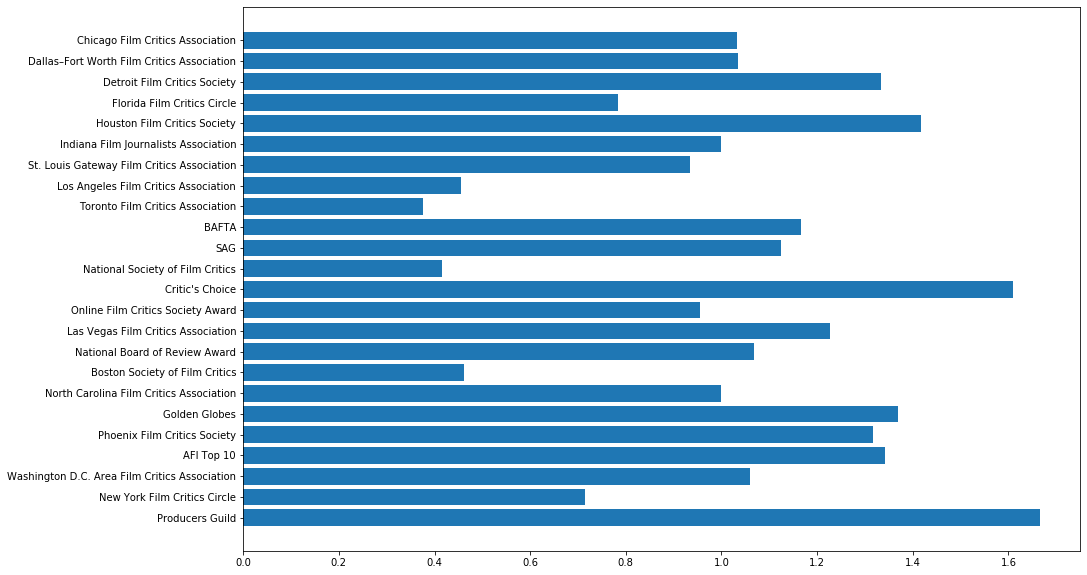

In [238]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize=(15,10))
plt.barh(df['lab'], df['val'])
plt

My next thought was to use these weighted predictors to look at how dominating or surprising a Best Picture winner was

In [239]:
bp = bestPictures.fillna(-1)
for index, row in bestPictures.iterrows(): 
    total = 0
    i = 0
    nan = 0
    if index >= 1993: 
        for col in bestPictures:
            if i == 1:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(PG*bp.loc[index,col])
            if i == 2:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NY*bp.loc[index,col])
            if i == 3:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(DC*bp.loc[index,col])
            if i == 4:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(AFI*bp.loc[index,col])
            if i == 5:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(PHX*bp.loc[index,col])
            if i == 6:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(GG*bp.loc[index,col])
            if i == 7:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NC*bp.loc[index,col])
            if i == 8:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(BOS*bp.loc[index,col])
            if i == 9:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NB*bp.loc[index,col])
            if i == 10:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(LV*bp.loc[index,col])
            if i == 11:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(OFC*bp.loc[index,col])
            if i == 12:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(CC*bp.loc[index,col])
            if i == 13:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NS*bp.loc[index,col])
            if i == 14:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(SAG*bp.loc[index,col])
            if i == 15:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(BAFTA*bp.loc[index,col])
            if i == 16:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(TF*bp.loc[index,col])
            if i == 17:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(LA*bp.loc[index,col])
            if i == 18:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(STL*bp.loc[index,col])
            if i == 19:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(IND*bp.loc[index,col])
            if i == 20:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(HOU*bp.loc[index,col])
            if i == 21:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(FLA*bp.loc[index,col])
            if i == 22:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(DET*bp.loc[index,col])
            if i == 23:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(DFW*bp.loc[index,col])
            if i == 24:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(CHI*bp.loc[index,col])
            i+=1
        bestPictures.loc[index,"Weighted Total"] = total/(24-nan)


## The Dominant Winners and The Surprise Winners
I only looked at the last 25 years because before that most of the predictive awards were non-existant. As you can see, No Country for old man dominated the awards season while Braveheart had the least credentials.

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

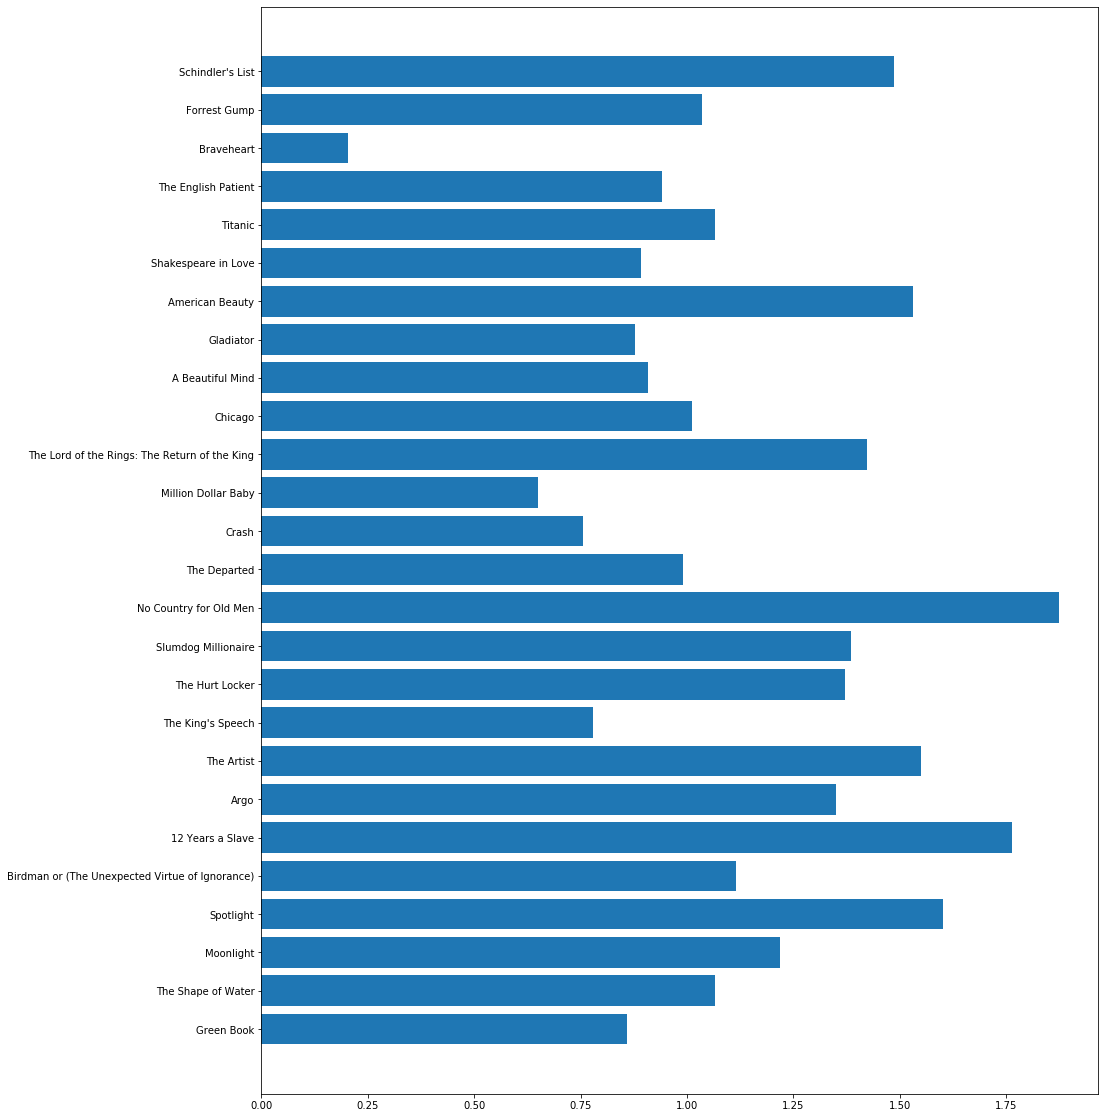

In [240]:
plt.figure(figsize=(15,20))
plt.barh(bestPictures.loc[2018:1993,"Best Picture"], bestPictures.loc[2018:1993,"Weighted Total"])
plt

# How Were The Reviews?
Next I looked at all the Best Pictures IMDb Scores and Rotten Tomatoes Scores

In [241]:
imdb = [8.2,7.3,7.4,8.1,7.7,8.1,7.7,7.9,8.0,7.6,8.0,8.1,8.5,7.8,8.1,8.9,7.1,8.2,8.5,8.3,7.1,7.8,7.4,8.3,8.8,8.9,8.2\
        ,8.6,8.0,7.4,8.0,7.7,8.1,7.2,8.3,7.4,8.0,7.2,7.7,7.8,8.1,8.0,8.1,8.7,9.0,8.3,9.2,7.7,7.9,7.8,7.4,8.0,7.7\
        ,8.0,7.8,6.5,8.3,7.5,8.3,8.1,6.7,8.1,6.8,7.7,8.1,7.6,6.6,7.2,8.2,7.5,7.6,7.2,8.0,7.9,7.1,8.5,7.6,7.7,8.1\
        ,8.1,7.9,7.2,6.7,7.7,8.1,5.9,7.4,5.9,8.0,5.7,7.5]
bestPictures["IMDb Scores"] = imdb

In [242]:
rt = [93,35,100,55,86,58,98,94,62,78,92,90,100,91,92,98,80,100,96,78,91,97,100,95,45,92,98,100,71,95,79,86,94,93,98,\
     85,95,84,82,96,82,91,96,98,98,93,97,94,94,97,94,89,89,84,84,84,93,60,88,91,90,81,82,96,96,97,72,77,85,89,92,87,\
     76,74,86,93,91,74,91,93,91,97,95,95,96,95,91,97,98,92,78]
rt = rt[::-1]
bestPictures["Rotten Tomatoes Scores"] = rt


# The Best Best Pictures and The Worst Best Pictures
The Graph shows each year's Best Picture IMDb score on the x-axis and Rotten Tomatoes Score on the y-axis. The red point is the average. The highest rated best picture, labeled 1972, is The Godfather. The lowest rated movie, labeled 1929, is The Broadway Melody. It is the first film with sound to win. However, now that the novelty of having sounds and music is movies have worn off, the movie has not stood the test of time.

As an important note, the Academy Awards for a specific year are held the year after. For example, the Academy Awards for 2018 movies, when Green Book won, were held in February of 2019, whereas the award show held in 2018 was for 2017 movies. So when a point is labeled with a year, it is talking about when the movie was made, not the year is was awarded Best Picture. 

<Figure size 432x288 with 0 Axes>

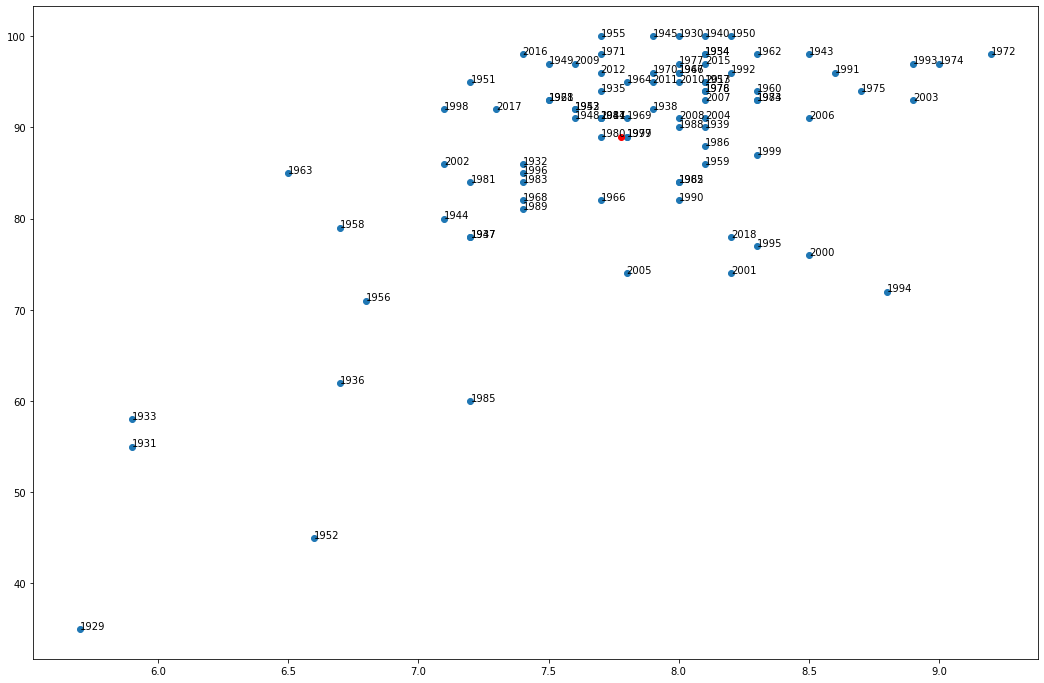

In [243]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(18,12))
ax.scatter(bestPictures.loc[:,"IMDb Scores"],bestPictures.loc[:,"Rotten Tomatoes Scores"])
ax.scatter(7.78,88.94,color = "r")
for i, txt in enumerate(bestPictures.index):
    ax.annotate(txt,(bestPictures.loc[txt,"IMDb Scores"],bestPictures.loc[txt,"Rotten Tomatoes Scores"]))
ax


# The Current Race
Looking at the 10 films with the best Best Picture odds, and what awards have been given out so far.

So far The New York Film Critics Circle, Washington D.C. Area Film Critics, AFI Top 10, National Board of Review, Toronto Film Critics Association, Los Angeles Film Critics Association, and Detroit Film Critics Society have given out awards. 

The Golden Globes, Critic's Choice, SAG, and St. Louis Gateway Film Critics Association have only given out nominations. The rest have yet to give out anything. 

The Ten Movies I looked at are: 
**The Irishman
Once Upon a Time in Hollywood
Parasite
Marriage Story
1917
JoJo Rabbit
Joker
Ford v Ferrari
Little Women
Knives Out**

In [244]:
irishman = ["The Irishman",None,2,1,1.5,None,1,None,None,2,None,None,1,None,1,None,1,0,1,None,None,None,1,None,None,None]
ouatih = ["Once Upon a Time in Hollywood",None,0,1,1.5,None,1,None,None,1,None,None,1,None,1,None,0,0,1,None,None,None,1,None,None,None]
parasite = ["Parasite",None,0,2,1.5,None,1,None,None,2,None,None,1,None,1,None,2,2,0,None,None,None,2,None,None,None]
ms = ["Marriage Story",None,0,1,1.5,None,1,None,None,1,None,None,1,None,0,None,1,0,1,None,None,None,1,None,None,None]
a1917 = ["1917",None,0,1,1.5,None,1,None,None,1,None,None,1,None,0,None,0,0,1,None,None,None,0,None,None,None]
jojo = ["Jojo Rabbit",None,0,0,1.5,None,1,None,None,1,None,None,1,None,1,None,0,0,1,None,None,None,1,None,None,None]
joker = ["Joker",None,0,0,1.5,None,1,None,None,0,None,None,1,None,0,None,0,0,0,None,None,None,0,None,None,None]
fvf = ["Ford v Ferrari",None,0,0,0,None,0,None,None,1,None,None,1,None,0,None,0,0,0,None,None,None,0,None,None,None]
lw = ["Little Women",None,0,0,1.5,None,0,None,None,0,None,None,1,None,0,None,0,0,1,None,None,None,0,None,None,None]
ko = ["Knives Out",None,0,0,1.5,None,1,None,None,1,None,None,0,None,0,None,0,0,0,None,None,None,0,None,None,None]
contenders = pd.DataFrame([irishman,ouatih,parasite,ms,a1917,jojo,joker,fvf,lw,ko],columns = bestPictures.columns[:-2])
contenders = contenders.rename({'Best Picture': "Film"}, axis=1)
pd.set_option('display.max_colwidth', -1)
contenders


,Film,Producers Guild,New York Film Critics Circle,Washington D.C. Area Film Critics Association,AFI Top 10,Phoenix Film Critics Society,Golden Globes,North Carolina Film Critics Association,Boston Society of Film Critics,National Board of Review Award,...,Toronto Film Critics Association,Los Angeles Film Critics Association,St. Louis Gateway Film Critics Association,Indiana Film Journalists Association,Houston Film Critics Society,Florida Film Critics Circle,Detroit Film Critics Society,Dallas–Fort Worth Film Critics Association,Chicago Film Critics Association,Weighted Total
0,The Irishman,None,2,1,1.5,None,1,None,None,2,...,1,0,1,None,None,None,1,None,None,None
1,Once Upon a Time in Hollywood,None,0,1,1.5,None,1,None,None,1,...,0,0,1,None,None,None,1,None,None,None
2,Parasite,None,0,2,1.5,None,1,None,None,2,...,2,2,0,None,None,None,2,None,None,None
3,Marriage Story,None,0,1,1.5,None,1,None,None,1,...,1,0,1,None,None,None,1,None,None,None
4,1917,None,0,1,1.5,None,1,None,None,1,...,0,0,1,None,None,None,0,None,None,None
5,Jojo Rabbit,None,0,0,1.5,None,1,None,None,1,...,0,0,1,None,None,None,1,None,None,None
6,Joker,None,0,0,1.5,None,1,None,None,0,...,0,0,0,None,None,None,0,None,None,None
7,Ford v Ferrari,None,0,0,0.0,None,0,None,None,1,...,0,0,0,None,None,None,0,None,None,None
8,Little Women,None,0,0,1.5,None,0,None,None,0,...,0,0,1,None,None,None,0,None,None,None
9,Knives Out,None,0,0,1.5,None,1,None,None,1,...,0,0,0,None,None,None,0,None,None,None


# Analysis
Using the earlier weights of each award to see how each top film is doing so far

In [245]:
bp = contenders.fillna(-1)
for index, row in contenders.iterrows(): 
    total = 0
    i = 0
    nan = 0
    if index >= 0: 
        for col in contenders:
            if i == 1:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(PG*bp.loc[index,col])
            if i == 2:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NY*bp.loc[index,col])
            if i == 3:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(DC*bp.loc[index,col])
            if i == 4:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(AFI*bp.loc[index,col])
            if i == 5:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(PHX*bp.loc[index,col])
            if i == 6:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(GG*bp.loc[index,col])
            if i == 7:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NC*bp.loc[index,col])
            if i == 8:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(BOS*bp.loc[index,col])
            if i == 9:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NB*bp.loc[index,col])
            if i == 10:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(LV*bp.loc[index,col])
            if i == 11:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(OFC*bp.loc[index,col])
            if i == 12:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(CC*bp.loc[index,col])
            if i == 13:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NS*bp.loc[index,col])
            if i == 14:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(SAG*bp.loc[index,col])
            if i == 15:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(BAFTA*bp.loc[index,col])
            if i == 16:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(TF*bp.loc[index,col])
            if i == 17:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(LA*bp.loc[index,col])
            if i == 18:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(STL*bp.loc[index,col])
            if i == 19:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(IND*bp.loc[index,col])
            if i == 20:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(HOU*bp.loc[index,col])
            if i == 21:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(FLA*bp.loc[index,col])
            if i == 22:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(DET*bp.loc[index,col])
            if i == 23:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(DFW*bp.loc[index,col])
            if i == 24:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(CHI*bp.loc[index,col])
            i+=1
        contenders.loc[index,"Weighted Total"] = total/(24-nan)


## The Current Leader Board
For reference, the left red line is where Million Dollar Baby stood at this point in the race, and the right line is where No Country for Old Men("The Most Dominant Winner") was at this point of award's season. Although Braveheart was the "most surprising movie" of the past 25 years, 5 out of the currently out awards didn't exist when Braveheart was awarded Best Picture. Because of this, I decided to use Million Dollar Baby, the second "most suprising win" of the past 25 years as the left line. This would point to a 6 movie race, although 1917 is just be hanging on by a thread.

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

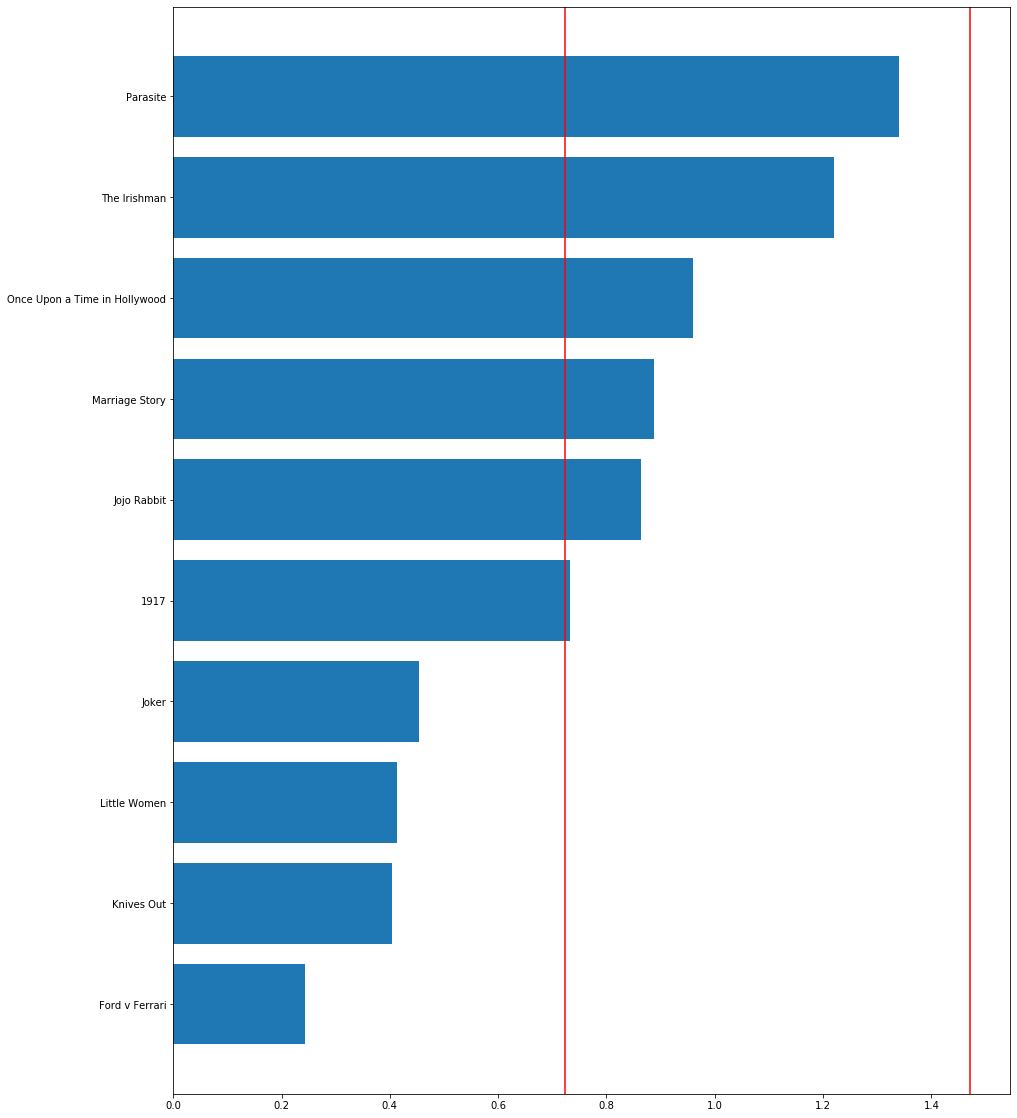

In [246]:
plt.figure(figsize=(15,20))
plt.axvline(x=16.191090788086715/11, color = "r")
plt.axvline(x=7.22590678345038/10, color = "r")
plt.barh(contenders.sort_values(by=['Weighted Total']).loc[:,"Film"], contenders.sort_values(by=['Weighted Total']).loc[:,"Weighted Total"])
plt

## Current Reviews
How the current movies review scores look. The red dot is the same as before (All the Best Pictures average).

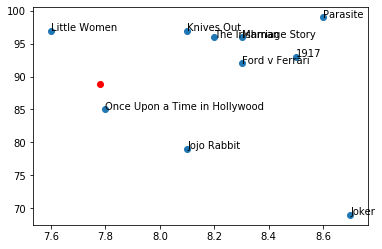

In [247]:
Cimdb = [8.2,7.8,8.6,8.3,8.5,8.1,8.7,8.3,7.6,8.1]
Crotten = [96,85,99,96,93,79,69,92,97,97]
contenders["IMDb Scores"] = Cimdb
contenders["Rotten Tomato Scores"] = Crotten
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Cimdb,Crotten)
for i, txt in enumerate(contenders['Film']):
    ax.annotate(txt,(Cimdb[i],Crotten[i]))
ax.scatter(7.78,88.94,color = "r")

# Sources For those Interested

[Current GoldDerby Oscar Predictions](https://www.goldderby.com/feature/2020-oscar-predictions-best-picture-1202807517/)

[Calendar of All Award Ceremonies](https://editorial.rottentomatoes.com/article/the-2019-2020-awards-season-calendar/)

[Best Picture Rotten Tomatoes Scores](https://editorial.rottentomatoes.com/guide/oscars-best-and-worst-best-pictures/)

[Best Picture IMDb Scores](https://m.imdb.com/chart/bestpicture/)

[538 Oscar Predictor](https://fivethirtyeight.com/features/oscars-2018-early-predictions-nominations/)

[Current Movie Awards Leaderboard, including awards other than Best Film](https://editorial.rottentomatoes.com/article/awards-leaderboard-top-movies-of-2019/)